In [1]:
import joblib

from utils import ROOTDIR

In [2]:
BASE_EXPORT_PATH = ROOTDIR / "models" / "training"

In [3]:
# type: ignore

X_train = joblib.load(BASE_EXPORT_PATH / "X_train.joblib")
X_test = joblib.load(BASE_EXPORT_PATH / "X_test.joblib")
y_train = joblib.load(BASE_EXPORT_PATH / "y_train.joblib")
y_test = joblib.load(BASE_EXPORT_PATH / "y_test.joblib")

In [4]:
le = joblib.load(BASE_EXPORT_PATH / "LabelEncoder.joblib")  # type: ignore

In [5]:
# type: ignore

len(X_train), len(y_train), len(X_test), len(y_test)

(92328, 92328, 24624, 24624)

---

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,  # type: ignore
    confusion_matrix,
)
from xgboost import XGBClassifier


In [7]:
model = XGBClassifier()

In [8]:
model.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [9]:
y_pred = model.predict(X_test)

<Figure size 1200x1200 with 0 Axes>

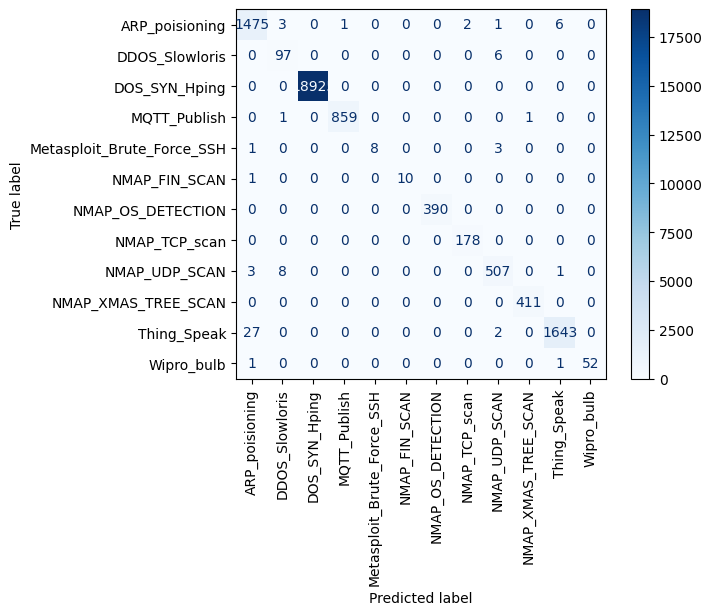

In [10]:
# type: ignore

plt.figure(figsize=(12, 12))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation='vertical', cmap='Blues', values_format='d')
plt.show()

In [11]:
# type: ignore

feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(10)

17    0.283552
36    0.091841
15    0.067904
13    0.064335
9     0.054246
8     0.049683
25    0.042099
56    0.039547
22    0.037699
21    0.029288
dtype: float32

In [12]:
print(classification_report(y_pred=y_pred, y_true=y_test)) # type: ignore

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1488
           1       0.89      0.94      0.92       103
           2       1.00      1.00      1.00     18925
           3       1.00      1.00      1.00       861
           4       1.00      0.67      0.80        12
           5       1.00      0.91      0.95        11
           6       1.00      1.00      1.00       390
           7       0.99      1.00      0.99       178
           8       0.98      0.98      0.98       519
           9       1.00      1.00      1.00       411
          10       1.00      0.98      0.99      1672
          11       1.00      0.96      0.98        54

    accuracy                           1.00     24624
   macro avg       0.99      0.95      0.97     24624
weighted avg       1.00      1.00      1.00     24624

